# Time Series Project on Zillow Database by Luigi Fiori


For this project, we will be forecasting real estate prices of various Zip Codes using data from the Zillow Research Page, an american online real estate database company.

![https://raw.githubusercontent.com/illumi91/dsc-mod-4-project-online-ds-pt-051319/master/zillow%20project/246x0w.jpg](https://raw.githubusercontent.com/illumi91/dsc-mod-4-project-online-ds-pt-051319/master/zillow%20project/246x0w.jpg)

I will be acting as a consultant for a fictional real-estate investment firm.

Our goal is to formulate a Time Series analysis such that we can get some valuable insights for a potential company.
In particular we have been asked to find the 5 best Zip Codes, in Kansas City, in terms of potential investment for a 3 years period of time.

We'll be following the OSEMN methodology:

1.Obtain-->Filtering our data for chosen Zipcodes in Kansas City

2.Scrub--->we'll reshape our dataframe and in addition, we'll set the time column as our index to allow easy manipulation of our data

3.Explore->Plotting our data allows us to identify the peaks and fails, trends and even noise.

4.Model-->  -Detrend the time series using differencing
            
            -Try several p, d, q parameters
            
            -Fit the model
            
            -Calculate MSE
            
            -Decide the AR,I, MA, and order of these models based on the lowest MSE

5.Interpret->Obtain valuable Insights and give raccomandations

# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import folium

# Load the Data/Filtering for Chosen Zipcodes

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\Module04\dsc-mod-4-project-online-ds-pt-051319

07/11/2019  13:47    <DIR>          .
07/11/2019  13:47    <DIR>          ..
25/10/2019  14:34                29 .gitignore
05/11/2019  12:31    <DIR>          .ipynb_checkpoints
25/10/2019  14:34                93 .learn
31/10/2019  13:43    <DIR>          click_that_hood
25/10/2019  14:34    <DIR>          images
05/11/2019  12:31            14,522 index.ipynb
25/10/2019  14:34             1,371 LICENSE.md
25/10/2019  14:34            78,048 module4_project_rubric.pdf
03/11/2019  14:35           276,204 presentation_zillow.pdf
03/11/2019  15:25             4,554 README.md
07/11/2019  13:47         1,384,506 time_analysis_notebook.ipynb
03/11/2019  12:37    <DIR>          zillow project
25/10/2019  14:34        26,312,281 zillow_data.csv
               9 File(s)     28,071,608 bytes
               6 Dir(s)  57,147,023,360 bytes free


In [3]:
df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [4]:
df.dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
               ...   
2015-11         int64
2015-12         int64
2016-01         int64
2016-02         int64
2016-03         int64
2016-04         int64
2016-05         int64
2016-06         int64
2016-07         int64
2016-08         int64
2016-09         int64
2016-10         int64
2016-11         int64
2016-12         int64
2017-01   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
df.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)

In order to focus our attention on Kansas City, in the next step we're going to filter our Dataframe.

Using .shape we get the number of zipcodes that we'll be using to work on.

In [7]:
df[df['City'] == 'Kansas City'].shape

(37, 270)

In [8]:
def melt_data(df):
    '''
    function to reshape dataframe into a pandas datetime from wide to long format
    '''
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})


def evaluate_arima_model(X, arima_order):
    '''
    evaluate an ARIMA model for a given order (p,d,q)
    '''
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
def evaluate_models(dataset, p_values, d_values, q_values):
    '''
     evaluate combinations of p, d and q values for an ARIMA model
    '''
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg

In [9]:
df_melted = melt_data(df)
df_melted.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


Let's plot our data to see the value of the properties over time.

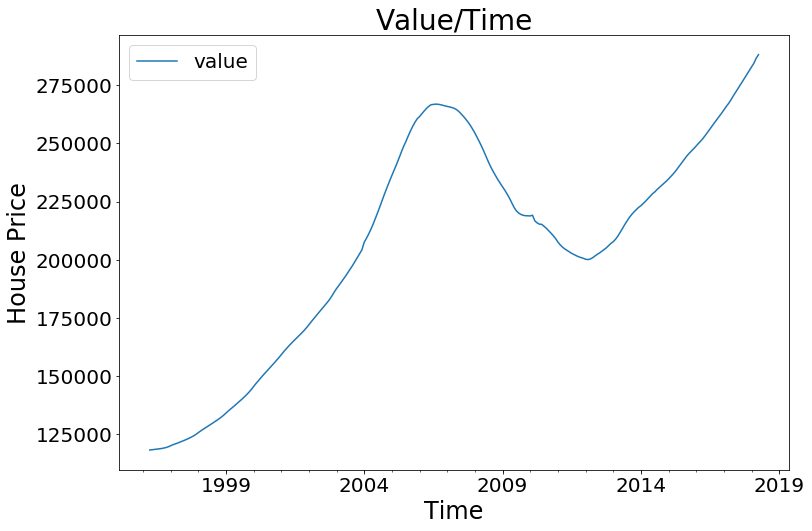

In [10]:
df_melted.plot(kind='line', figsize=(12,8))
plt.title('Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

Comes out that we're in front of a linear upward trend, that falls down in 2008, due to the crysis and around 2012 starts going up again.

# Time Series Analysis

In order to find the 5 best zipcodes we are going to calculate the Return on investment (ROI).

This is a ratio between net profit (over a period) and cost of investment (resulting from an investment of some resources at a point in time). 

A high ROI means the investment's gains compare favorably to its cost. 


What we are going to do next is to find the best ARIMA model for the 5 best zipcodes.

## Note on modeling

What we will be doing for any time series is:

- Detrend the time series using differencing
- Try several p, d, q parameters
- Fit the model
- Calculate MSE 
- Decide the AR,I, MA, and order of these models based on the lowest MSE

In [11]:
roi_list = {}
for index, x in df[df['City'] == 'Kansas City'].iterrows():
    '''
    function that loop through each single zipcode, apply and evaluate the best ARIMA model
    through the smallest MSE based on several values and 
    '''
    print(x['RegionName'])
    series = melt_data(df.loc[[index]])
    # evaluate parameters
    p_values = [0, 1, 2]
    d_values = range(0, 2)
    q_values = range(0, 2)
    warnings.filterwarnings("ignore")
    
    order = evaluate_models(series.values, p_values, d_values, q_values)
    
    model= ARIMA(series, order=order)
    model_fit= model.fit()
    thirty_six_months = model_fit.forecast(steps=36)[0][-1]
    today = series.iloc[-1].value
    roi = (thirty_six_months - today)/today
    roi_list[x['RegionName']] = roi

64119
ARIMA(0, 0, 0) MSE=93611590.076
ARIMA(0, 0, 1) MSE=24344135.774
ARIMA(0, 1, 0) MSE=875810.127
ARIMA(0, 1, 1) MSE=351653.230
ARIMA(1, 0, 0) MSE=921897.011
ARIMA(1, 1, 0) MSE=337473.443
ARIMA(1, 1, 1) MSE=256744.799
ARIMA(2, 0, 0) MSE=338327.407
ARIMA(2, 0, 1) MSE=259557.192
ARIMA(2, 1, 0) MSE=291309.276
ARIMA(2, 1, 1) MSE=259864.982
Best ARIMA(1, 1, 1) MSE=256744.799
64114
ARIMA(0, 0, 0) MSE=559210333.009
ARIMA(0, 0, 1) MSE=144359078.033
ARIMA(0, 1, 0) MSE=881044.928
ARIMA(0, 1, 1) MSE=322385.536
ARIMA(1, 0, 0) MSE=1130423.428
ARIMA(1, 1, 0) MSE=182842.663
ARIMA(1, 1, 1) MSE=157165.738
ARIMA(2, 0, 0) MSE=185511.413
ARIMA(2, 1, 0) MSE=170707.770
ARIMA(2, 1, 1) MSE=159283.549
Best ARIMA(1, 1, 1) MSE=157165.738
64151
ARIMA(0, 0, 0) MSE=348965340.874
ARIMA(0, 0, 1) MSE=90068757.065
ARIMA(0, 1, 0) MSE=1476214.284
ARIMA(0, 1, 1) MSE=555361.512
ARIMA(1, 0, 0) MSE=1611215.523
ARIMA(1, 1, 0) MSE=589199.533
ARIMA(1, 1, 1) MSE=372531.470
ARIMA(2, 0, 0) MSE=593654.932
ARIMA(2, 0, 1) MSE=37947

ARIMA(1, 1, 1) MSE=225963.580
ARIMA(2, 0, 0) MSE=315311.063
ARIMA(2, 0, 1) MSE=227134.652
ARIMA(2, 1, 0) MSE=281724.451
ARIMA(2, 1, 1) MSE=231416.459
Best ARIMA(1, 1, 1) MSE=225963.580
64105
ARIMA(0, 0, 0) MSE=233439718.259
ARIMA(0, 0, 1) MSE=59342038.307
ARIMA(0, 1, 0) MSE=1685229.670
ARIMA(0, 1, 1) MSE=734414.826
ARIMA(1, 0, 0) MSE=1585561.399
ARIMA(1, 1, 0) MSE=1016577.926
ARIMA(1, 1, 1) MSE=682609.006
ARIMA(2, 0, 0) MSE=1018268.790
ARIMA(2, 0, 1) MSE=686752.896
ARIMA(2, 1, 0) MSE=856858.046
ARIMA(2, 1, 1) MSE=676616.762
Best ARIMA(2, 1, 1) MSE=676616.762
64129
ARIMA(0, 0, 0) MSE=116257594.074
ARIMA(0, 0, 1) MSE=28874146.911
ARIMA(0, 1, 0) MSE=727670.750
ARIMA(0, 1, 1) MSE=294036.101
ARIMA(1, 0, 0) MSE=705104.698
ARIMA(1, 1, 0) MSE=357629.389
ARIMA(1, 1, 1) MSE=251863.181
ARIMA(2, 0, 1) MSE=250819.286
ARIMA(2, 1, 0) MSE=323110.471
ARIMA(2, 1, 1) MSE=256519.700
Best ARIMA(2, 0, 1) MSE=250819.286
64123
ARIMA(0, 0, 0) MSE=23137869.162
ARIMA(0, 0, 1) MSE=5809465.250
ARIMA(0, 1, 0) MSE=6

In [12]:
roi_list

{64119: 0.05679732209422842,
 64114: 0.1192970729762698,
 64151: 0.05905026321941397,
 64111: 0.09693136094924668,
 66102: 0.01407573960837967,
 64131: 0.04546284263701976,
 66104: 0.0017268933293670607,
 64155: 0.06257263719843865,
 66109: 0.07817196811403077,
 64134: 0.04056394230247112,
 64116: 0.07975137309361202,
 66106: 0.1373985358861824,
 64157: 0.06528310078178046,
 64110: 0.08353030324922359,
 64117: 0.06822308914977174,
 66103: 0.10155508045775981,
 64112: 0.10592691843828653,
 66112: 0.08488559860951322,
 64154: 0.04150743227539524,
 64108: 0.03203111596063606,
 64113: 0.08080219700287117,
 64106: 0.14737096179258374,
 64124: 0.0067724159021344005,
 64137: 0.06481306716880608,
 64105: 0.06870997231295099,
 64129: -0.01684479110929328,
 64123: 0.05745865294676608,
 66111: 0.06020684041017004,
 64126: 0.06094194217722193,
 64156: 0.06920193050296697,
 64153: 0.05623209319876416,
 64158: 0.06907822253949673,
 64145: 0.09720449413548049,
 64136: 0.04962982541605204,
 64125: 0.0

Let's sort our dictionary

In [13]:
s = [(k, roi_list[k]) for k in sorted(roi_list, key=roi_list.get, reverse=True)]
for k, v in s:
    print(k, v)

64106 0.14737096179258374
66106 0.1373985358861824
64114 0.1192970729762698
64112 0.10592691843828653
66103 0.10155508045775981
64145 0.09720449413548049
64111 0.09693136094924668
64139 0.09670521678169679
66112 0.08488559860951322
64110 0.08353030324922359
64113 0.08080219700287117
64116 0.07975137309361202
66109 0.07817196811403077
64156 0.06920193050296697
64158 0.06907822253949673
64105 0.06870997231295099
64117 0.06822308914977174
64157 0.06528310078178046
64137 0.06481306716880608
64155 0.06257263719843865
64126 0.06094194217722193
66111 0.06020684041017004
64151 0.05905026321941397
64123 0.05745865294676608
64119 0.05679732209422842
64125 0.05666884598152787
64153 0.05623209319876416
64136 0.04962982541605204
64131 0.04546284263701976
64146 0.044572768695209576
64154 0.04150743227539524
64134 0.04056394230247112
64108 0.03203111596063606
66102 0.01407573960837967
64124 0.0067724159021344005
66104 0.0017268933293670607
64129 -0.01684479110929328


Here we have our 5 best zipcodes.

In [14]:
top_5 = s[:5]
top_5

[(64106, 0.14737096179258374),
 (66106, 0.1373985358861824),
 (64114, 0.1192970729762698),
 (64112, 0.10592691843828653),
 (66103, 0.10155508045775981)]

In [15]:
df_top_5 = pd.DataFrame(top_5)
df_top_5
df_top_5.columns = ['ZipCode', 'ROI']
df_top_5

,ZipCode,ROI
0,64106,0.147371
1,66106,0.137399
2,64114,0.119297
3,64112,0.105927
4,66103,0.101555


In [16]:
# let's set this option so that the results are not defined in scientific terms
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Let's check the relation between zipcode, city and ROI

In [17]:
#Get Location Names
best5_zipcodes = top_5
best_5 = {}
for i in top_5:
    city = df[df['RegionName']==i[0]].City.values[0]
    state = df[df['RegionName']==i[0]].State.values[0]
    print(f'Zipcode : {i[0]} \nLocation: {city}, {state}\nROI : {i[1]}\n')

Zipcode : 64106 
Location: Kansas City, MO
ROI : 0.14737096179258374

Zipcode : 66106 
Location: Kansas City, KS
ROI : 0.1373985358861824

Zipcode : 64114 
Location: Kansas City, MO
ROI : 0.1192970729762698

Zipcode : 64112 
Location: Kansas City, MO
ROI : 0.10592691843828653

Zipcode : 66103 
Location: Kansas City, KS
ROI : 0.10155508045775981



If we would invest 1000000 which value we would expect to have back in 3 years?

In [18]:
df_top_5['Value In 3 Years 1000000 Invested'] = (df_top_5['ROI']+1)*1000000
df_top_5

,ZipCode,ROI,Value In 3 Years 1000000 Invested
0,64106,0.15,1147370.96
1,66106,0.14,1137398.54
2,64114,0.12,1119297.07
3,64112,0.11,1105926.92
4,66103,0.10,1101555.08


We want to plot the values for our 5 best zipcodes in order to get an understanding of the prices and their differences.

# Zipcode : 64106 
# Location: Kansas City, MO

In [19]:
zc_64106 = df[df['RegionName'] == 64106]
zc_64106 = melt_data(zc_64106)
zc_64106.head()
zc_64106.tail()

,value
time,
2017-12-01,173400.00
2018-01-01,173200.00
2018-02-01,174000.00
2018-03-01,179300.00
2018-04-01,185300.00


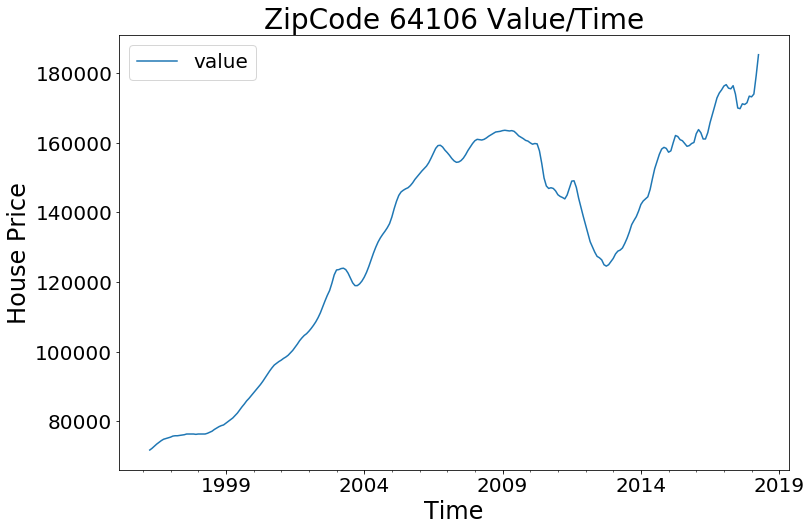

In [20]:
zc_64106.plot(figsize=(12,8))
plt.title('ZipCode 64106 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [21]:
model = ARIMA(zc_64106, order = (1,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2079.527
Method:                       css-mle   S.D. of innovations            635.630
Date:                Thu, 07 Nov 2019   AIC                           4167.054
Time:                        14:33:57   BIC                           4181.358
Sample:                    05-01-1996   HQIC                          4172.801
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           469.4010    179.878      2.610      0.010     116.846     821.956
ar.L1.D.value     0.6409      0.052     12.245      0.000       0.538       0.744
ma.L1.D.value     0.6632      0.043     

The model returns a lot of information, but we'll focus only on the table of coefficients. 

The coef column above shows the importance of each feature and how each one impacts the time series patterns. 

The P>|z| provides the significance of each feature weight.

For our time-series, we see that each weight has a p-value lower than 0.05, so it is reasonable to retain all of them in our model.

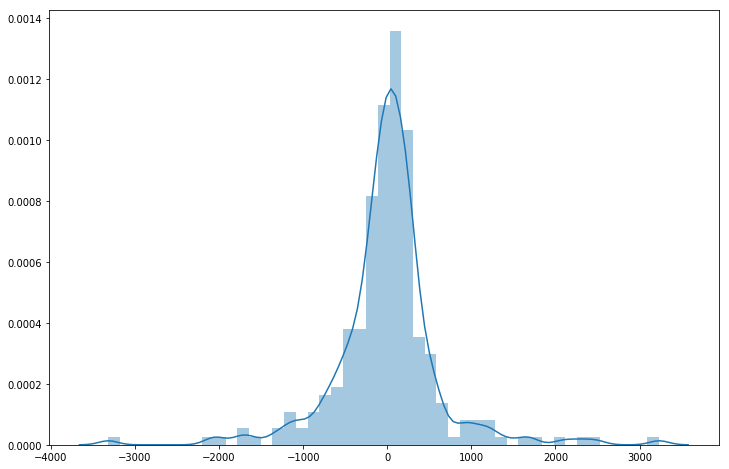

In [22]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12,8))
sns.distplot(residuals);

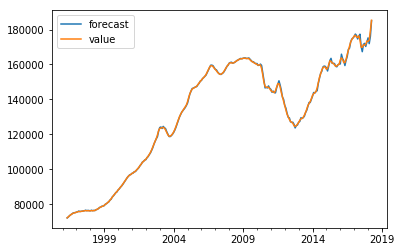

In [23]:
model_fit.plot_predict()
plt.show()

As we can see our residuals are relatively normal.

Next step is to create a graphic with the actual value for the properties that we already have and the forecast.
To do so we are first going to create a new DateTime Index starting 1 month after our actual DateTime and ending 36 months after.

In [24]:
new_per = pd.date_range(start='2018/04/01', periods=36, freq='MS')
new_per[:5]

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01'],
              dtype='datetime64[ns]', freq='MS')

Here we can see all our values forecasted for the next 36 months.

In [25]:
model_fit.forecast(36)[0]

array([189506.93847454, 192371.89933686, 194376.72496013, 195830.25030631,
       196930.42192191, 197804.11286245, 198532.64191072, 199168.13001869,
       199743.98390421, 200281.6154709 , 200794.7485936 , 201292.1795356 ,
       201779.54622702, 202260.46227688, 202737.24381355, 203211.37535036,
       203683.80838025, 204155.15275884, 204625.79937071, 205095.99875174,
       205565.91148195, 206035.64048444, 206505.25172738, 206974.78749281,
       207444.27488122, 207913.73126257, 208383.16777007, 208852.5915395 ,
       209322.00714452, 209791.41751659, 210260.82453463, 210730.22940291,
       211199.63289331, 211669.03550056, 212138.43754177, 212607.83922017])

In [26]:
df_forecast = pd.DataFrame(model_fit.forecast(36)[0])
df_forecast.columns = ['Value']
df_forecast.head()

,Value
0,189506.94
1,192371.90
2,194376.72
3,195830.25
4,196930.42


In [27]:
df_forecast = df_forecast.set_index(new_per)
df_forecast.head()

,Value
2018-04-01,189506.94
2018-05-01,192371.90
2018-06-01,194376.72
2018-07-01,195830.25
2018-08-01,196930.42


We are going to plot our forecast.

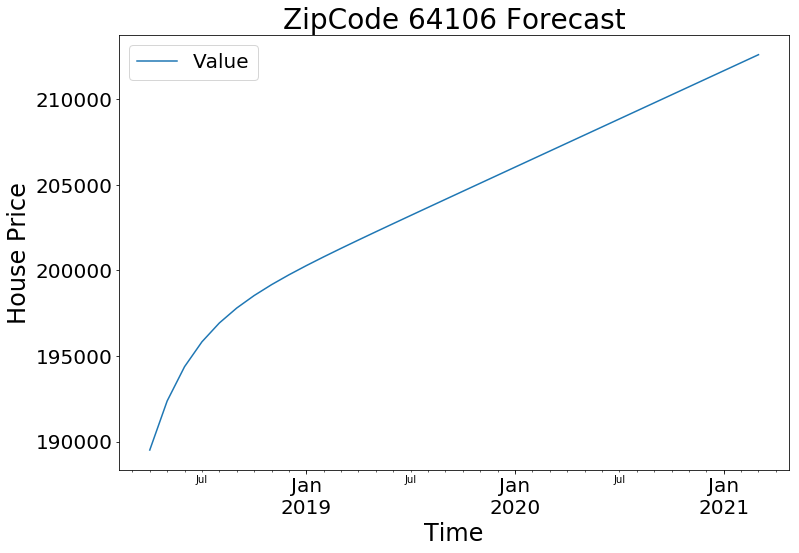

In [28]:
df_forecast.plot(figsize=(12,8))
plt.title('ZipCode 64106 Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

At this point we concatenate the actual values and the forecast.

In [29]:
zc_64106_forecast = pd.concat([zc_64106, df_forecast])
print(zc_64106_forecast.head())
print(zc_64106_forecast.tail())

            Value    value
1996-04-01    nan 71800.00
1996-05-01    nan 72300.00
1996-06-01    nan 72900.00
1996-07-01    nan 73500.00
1996-08-01    nan 74000.00
               Value  value
2020-11-01 210730.23    nan
2020-12-01 211199.63    nan
2021-01-01 211669.04    nan
2021-02-01 212138.44    nan
2021-03-01 212607.84    nan


In [30]:
zc_64106_forecast.rename(columns={"Value": "Forecast Value", "value": "Current Value"}, inplace=True)
zc_64106_forecast.head()

,Forecast Value,Current Value
1996-04-01,nan,71800.00
1996-05-01,nan,72300.00
1996-06-01,nan,72900.00
1996-07-01,nan,73500.00
1996-08-01,nan,74000.00


Now we are going to plot our Value plus the forecast on the same graphic.

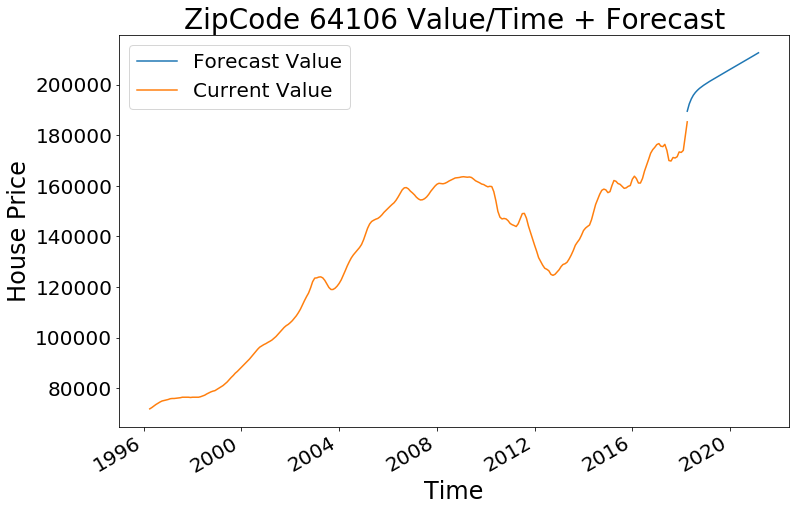

In [31]:
zc_64106_forecast.plot(figsize=(12,8))
plt.title('ZipCode 64106 Value/Time + Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

# Zipcode : 66106 
# Location: Kansas City, KS

In [32]:
zc_66106 = df[df['RegionName'] == 66106]
zc_66106 = melt_data(zc_66106)
zc_66106.head()

,value
time,
1996-04-01,50600.00
1996-05-01,50800.00
1996-06-01,50900.00
1996-07-01,51100.00
1996-08-01,51200.00


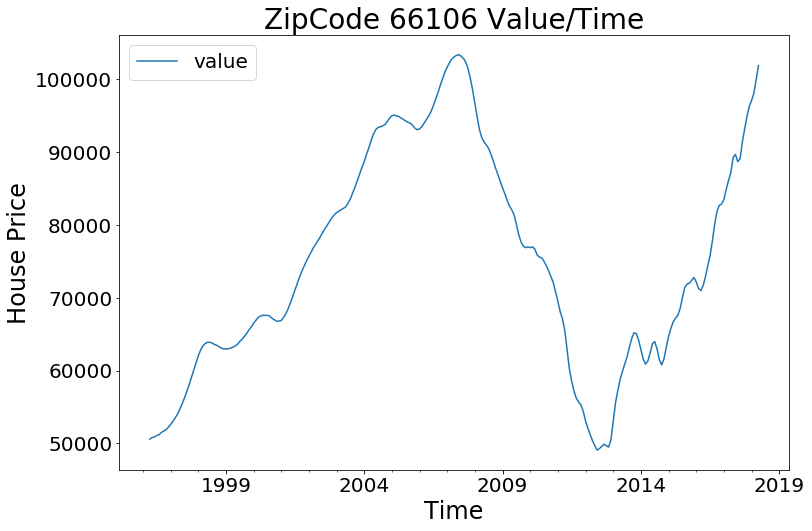

In [33]:
zc_66106.plot(figsize=(12,8))
plt.title('ZipCode 66106 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [34]:
model = ARIMA(zc_66106, order = (1,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1919.076
Method:                       css-mle   S.D. of innovations            345.845
Date:                Thu, 07 Nov 2019   AIC                           3846.152
Time:                        14:33:58   BIC                           3860.456
Sample:                    05-01-1996   HQIC                          3851.900
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           219.5043    166.302      1.320      0.188    -106.441     545.449
ar.L1.D.value     0.7970      0.038     20.703      0.000       0.722       0.872
ma.L1.D.value     0.6112      0.042     

The model returns a lot of information, but we'll focus only on the table of coefficients. 

The coef column above shows the importance of each feature and how each one impacts the time series patterns. 

The P>|z| provides the significance of each feature weight.

For our time-series, we see that each weight has a p-value lower than 0.05, so it is reasonable to retain all of them in our model.

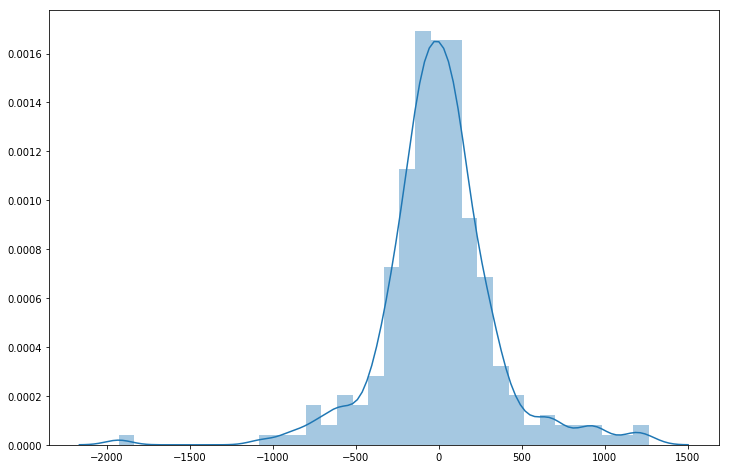

In [35]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12,8))
sns.distplot(residuals);

As we can see our residuals are relatively normal.

<Figure size 864x576 with 0 Axes>

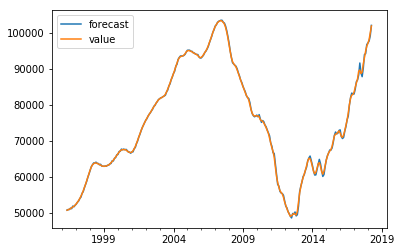

In [36]:
plt.figure(figsize=(12,8))
model_fit.plot_predict();

Next step is to create a graphic with the actual value for the properties that we already have and the forecast.
To do so we are first going to create a new DateTime Index starting 1 month after our actual DateTime and ending 36 months after.

In [37]:
new_per = pd.date_range(start='2018/04/01', periods=36, freq='MS')
new_per[:5]

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01'],
              dtype='datetime64[ns]', freq='MS')

Here we can see all our values forecasted for the next 36 months.

In [38]:
model_fit.forecast(36)[0]

array([103358.17446377, 104564.84354963, 105571.07408599, 106417.56405352,
       107136.74792456, 107754.47452443, 108291.34421207, 108763.77455316,
       109184.84961406, 109564.99681107, 109912.52632914, 110234.06101438,
       110534.87897924, 110819.18664352, 111090.3363359 , 111350.99971254,
       111603.30596403, 111848.95196016, 112089.29003034, 112325.39792067,
       112558.13454667, 112788.1844256 , 113016.09308717, 113242.29529416,
       113467.13753309, 113690.89593825, 113913.7905763 , 114135.99683056,
       114357.6544737 , 114578.87489829, 114799.74687922, 115020.34116612,
       115240.7141433 , 115460.9107465 , 115680.96678754, 115900.9108068 ])

In [39]:
df_forecast = pd.DataFrame(model_fit.forecast(36)[0])
df_forecast.columns = ['Value']
df_forecast.head()

,Value
0,103358.17
1,104564.84
2,105571.07
3,106417.56
4,107136.75


In [40]:
df_forecast = df_forecast.set_index(new_per)
df_forecast.head()

,Value
2018-04-01,103358.17
2018-05-01,104564.84
2018-06-01,105571.07
2018-07-01,106417.56
2018-08-01,107136.75


We are going to plot our forecast.

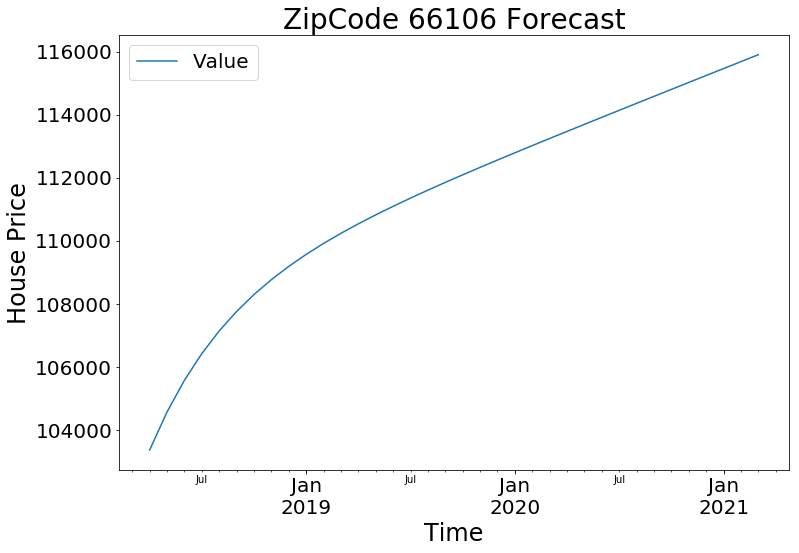

In [41]:
df_forecast.plot(figsize=(12,8))
plt.title('ZipCode 66106 Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

At this point we concatenate the actual values and the forecast.

In [42]:
zc_66106_forecast = pd.concat([zc_66106, df_forecast])
print(zc_66106_forecast.head())
print(zc_66106_forecast.tail())

            Value    value
1996-04-01    nan 50600.00
1996-05-01    nan 50800.00
1996-06-01    nan 50900.00
1996-07-01    nan 51100.00
1996-08-01    nan 51200.00
               Value  value
2020-11-01 115020.34    nan
2020-12-01 115240.71    nan
2021-01-01 115460.91    nan
2021-02-01 115680.97    nan
2021-03-01 115900.91    nan


In [43]:
zc_66106_forecast.rename(columns={"Value": "Forecast Value", "value": "Current Value"}, inplace=True)
zc_66106_forecast.head()

,Forecast Value,Current Value
1996-04-01,nan,50600.00
1996-05-01,nan,50800.00
1996-06-01,nan,50900.00
1996-07-01,nan,51100.00
1996-08-01,nan,51200.00


Now we are going to plot our Value plus the forecast on the same graphic.

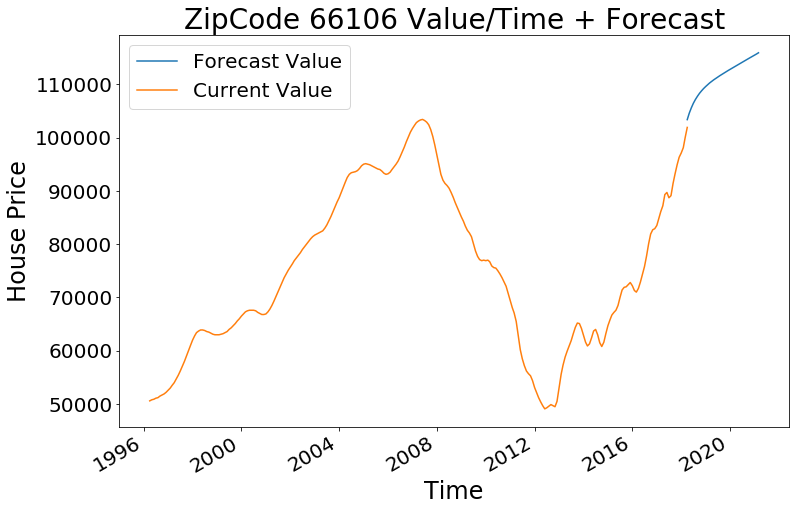

In [44]:
zc_66106_forecast.plot(figsize=(12,8))
plt.title('ZipCode 66106 Value/Time + Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

# Zipcode : 64114 
# Location: Kansas City, MO

In [45]:
zc_64114 = df[df['RegionName'] == 64114]
zc_64114 = melt_data(zc_64114)
zc_64114.head()

,value
time,
1996-04-01,87000.00
1996-05-01,87400.00
1996-06-01,87800.00
1996-07-01,88200.00
1996-08-01,88700.00


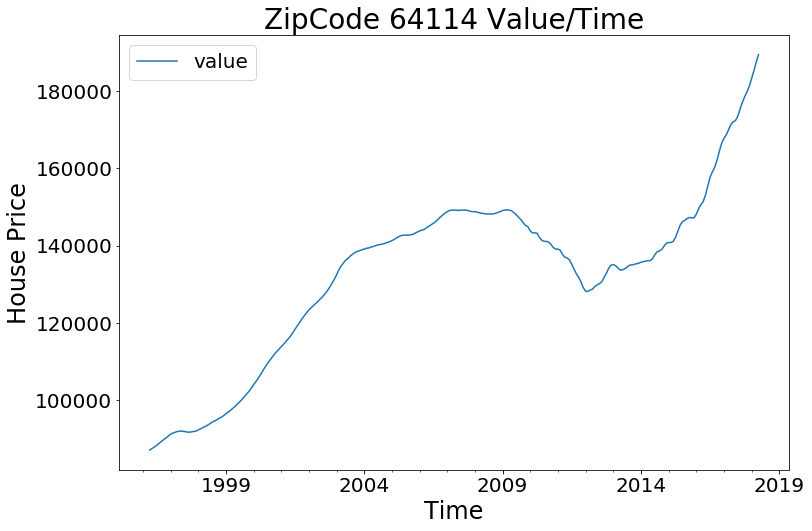

In [46]:
zc_64114.plot(figsize=(12,8))
plt.title('ZipCode 64114 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [47]:
model = ARIMA(zc_64114, order = (1,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1844.584
Method:                       css-mle   S.D. of innovations            260.939
Date:                Thu, 07 Nov 2019   AIC                           3697.168
Time:                        14:33:59   BIC                           3711.472
Sample:                    05-01-1996   HQIC                          3702.915
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           416.5372    135.790      3.068      0.002     150.394     682.680
ar.L1.D.value     0.8325      0.037     22.730      0.000       0.761       0.904
ma.L1.D.value     0.4421      0.053     

The model returns a lot of information, but we'll focus only on the table of coefficients. 

The coef column above shows the importance of each feature and how each one impacts the time series patterns. 

The P>|z| provides the significance of each feature weight.

For our time-series, we see that each weight has a p-value lower than 0.05, so it is reasonable to retain all of them in our model.

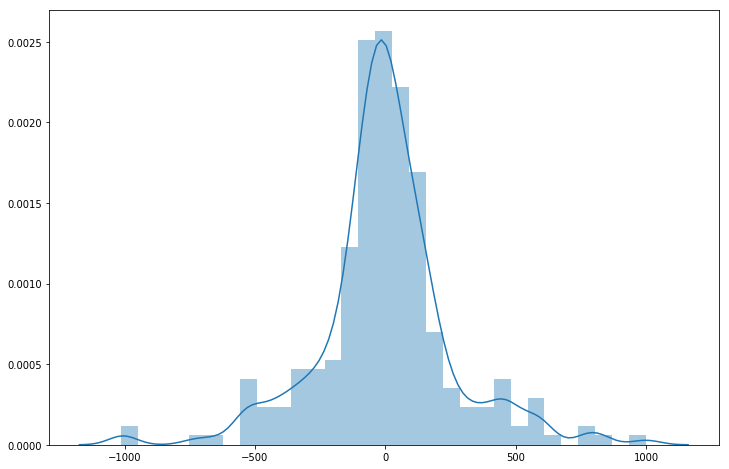

In [48]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12,8))
sns.distplot(residuals);

As we can see our residuals are relatively normal.

<Figure size 864x576 with 0 Axes>

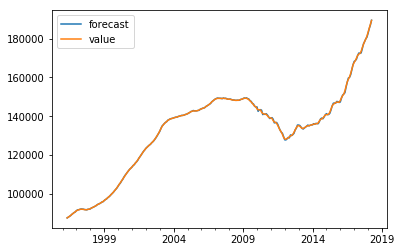

In [49]:
plt.figure(figsize=(12,8))
model_fit.plot_predict();

Next step is to create a graphic with the actual value for the properties that we already have and the forecast.
To do so we are first going to create a new DateTime Index starting 1 month after our actual DateTime and ending 36 months after.

In [50]:
new_per = pd.date_range(start='2018/04/01', periods=36, freq='MS')
new_per[:5]

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01'],
              dtype='datetime64[ns]', freq='MS')

Here we can see all our values forecasted for the next 36 months.

In [51]:
model_fit.forecast(36)[0]

array([191192.90444041, 192672.06624522, 193973.27912155, 195126.34270112,
       196156.06631841, 197083.10469432, 197924.65367491, 198695.02946043,
       199406.1508358 , 200067.94064582, 200688.66003874, 201275.18673683,
       201833.24670719, 202367.60703672, 202882.23650778, 203380.43928366,
       203864.9662068 , 204338.10745888, 204801.76970385, 205257.54031243,
       205706.74083155, 206150.47149961, 206589.64830722, 207025.03385164,
       207457.26302429, 207886.86439657, 208314.27802442, 208739.87027128,
       209163.9461487 , 209586.75959052, 210008.52200635, 210429.4094028 ,
       210849.56831211, 211269.12072799, 211688.16821486, 212106.795329  ])

In [52]:
df_forecast = pd.DataFrame(model_fit.forecast(36)[0])
df_forecast.columns = ['Value']
df_forecast.head()

,Value
0,191192.90
1,192672.07
2,193973.28
3,195126.34
4,196156.07


In [53]:
df_forecast = df_forecast.set_index(new_per)
df_forecast.head()

,Value
2018-04-01,191192.90
2018-05-01,192672.07
2018-06-01,193973.28
2018-07-01,195126.34
2018-08-01,196156.07


We are going to plot our forecast.

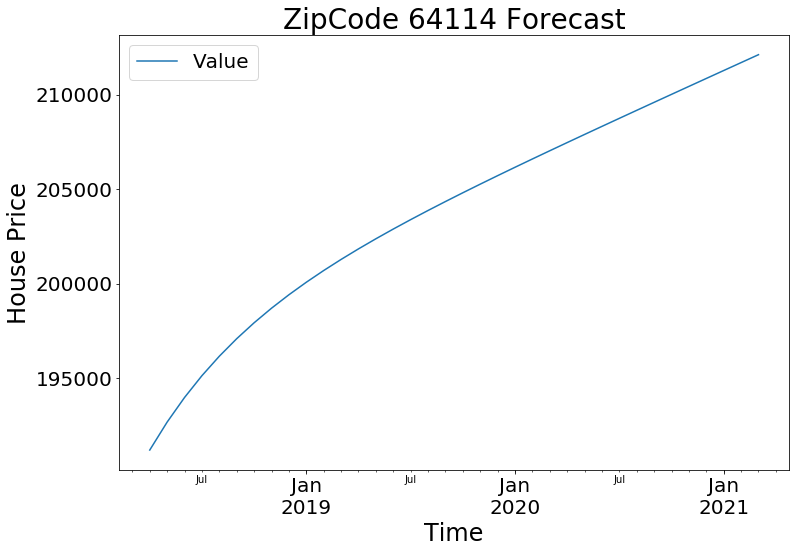

In [54]:
df_forecast.plot(figsize=(12,8))
plt.title('ZipCode 64114 Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

At this point we concatenate the actual values and the forecast.

In [55]:
zc_64114_forecast = pd.concat([zc_64114, df_forecast])
print(zc_64114_forecast.head())
print(zc_64114_forecast.tail())

            Value    value
1996-04-01    nan 87000.00
1996-05-01    nan 87400.00
1996-06-01    nan 87800.00
1996-07-01    nan 88200.00
1996-08-01    nan 88700.00
               Value  value
2020-11-01 210429.41    nan
2020-12-01 210849.57    nan
2021-01-01 211269.12    nan
2021-02-01 211688.17    nan
2021-03-01 212106.80    nan


In [56]:
zc_64114_forecast.rename(columns={"Value": "Forecast Value", "value": "Current Value"}, inplace=True)
zc_64114_forecast.head()

,Forecast Value,Current Value
1996-04-01,nan,87000.00
1996-05-01,nan,87400.00
1996-06-01,nan,87800.00
1996-07-01,nan,88200.00
1996-08-01,nan,88700.00


Now we are going to plot our Value plus the forecast on the same graphic.

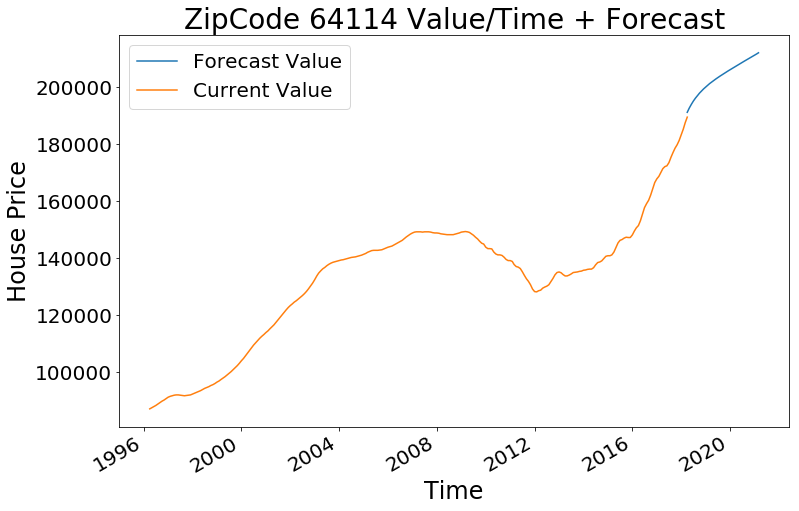

In [57]:
zc_64114_forecast.plot(figsize=(12,8))
plt.title('ZipCode 64114 Value/Time + Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

# Zipcode : 64112 
# Location: Kansas City, MO

In [58]:
zc_64112 = df[df['RegionName'] == 64112]
zc_64112 = melt_data(zc_64112)
zc_64112.head()

,value
time,
1996-04-01,118500.00
1996-05-01,119600.00
1996-06-01,120600.00
1996-07-01,121600.00
1996-08-01,122500.00


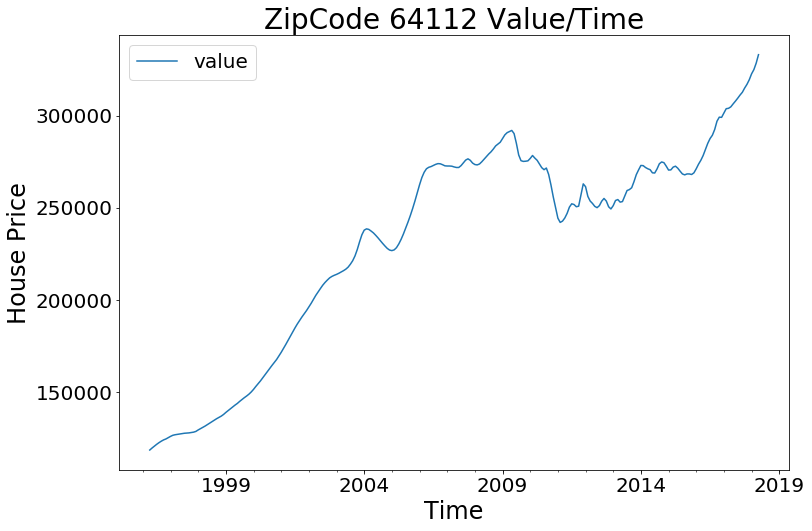

In [59]:
zc_64112.plot(figsize=(12,8))
plt.title('ZipCode 64112 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [60]:
model = ARIMA(zc_64112, order = (2,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2185.783
Method:                       css-mle   S.D. of innovations            950.484
Date:                Thu, 07 Nov 2019   AIC                           4381.565
Time:                        14:34:00   BIC                           4399.445
Sample:                    05-01-1996   HQIC                          4388.750
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           830.6250    230.141      3.609      0.000     379.557    1281.693
ar.L1.D.value     0.8407      0.076     11.050      0.000       0.692       0.990
ar.L2.D.value    -0.2270      0.073     

The model returns a lot of information, but we'll focus only on the table of coefficients. 

The coef column above shows the importance of each feature and how each one impacts the time series patterns. 

The P>|z| provides the significance of each feature weight.

For our time-series, we see that each weight has a p-value lower than 0.05, so it is reasonable to retain all of them in our model.

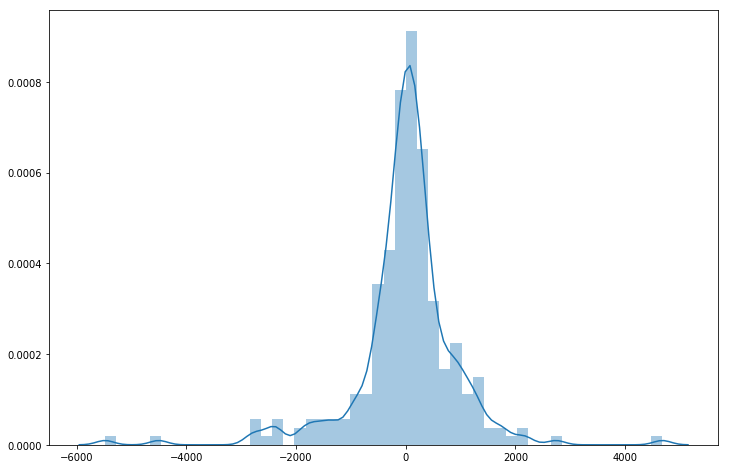

In [61]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12,8))
sns.distplot(residuals);

As we can see our residuals are relatively normal.

<Figure size 864x576 with 0 Axes>

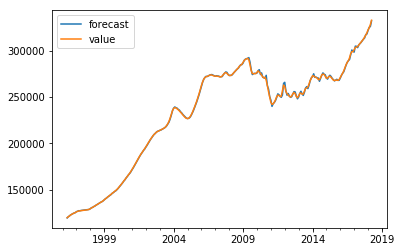

In [62]:
plt.figure(figsize=(12,8))
model_fit.plot_predict();

Next step is to create a graphic with the actual value for the properties that we already have and the forecast.
To do so we are first going to create a new DateTime Index starting 1 month after our actual DateTime and ending 36 months after.

In [63]:
new_per = pd.date_range(start='2018/04/01', periods=36, freq='MS')
new_per[:5]

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01'],
              dtype='datetime64[ns]', freq='MS')

Here we can see all our values forecasted for the next 36 months.

In [64]:
model_fit.forecast(36)[0]

array([336761.2940615 , 339200.01888399, 340717.26793375, 341760.07733417,
       342613.21368165, 343414.59597308, 344215.52665864, 345027.82631264,
       345849.78625211, 346677.28663114, 347507.25182662, 348338.03143743,
       349168.93618314, 349999.7612489 , 350830.49092187, 351661.15848722,
       352491.79549439, 353322.4209106 , 354153.04351941, 354983.66639931,
       355814.29014442, 356644.91455536, 357475.53932965, 358306.16425826,
       359136.7892341 , 359967.41421464, 360798.03918839, 361628.66415538,
       362459.28911822, 363289.9140791 , 364120.53903929, 364951.16399933,
       365781.78895941, 366612.41391955, 367443.03887974, 368273.66383995])

In [65]:
df_forecast = pd.DataFrame(model_fit.forecast(36)[0])
df_forecast.columns = ['Value']
df_forecast.head()

,Value
0,336761.29
1,339200.02
2,340717.27
3,341760.08
4,342613.21


In [66]:
df_forecast = df_forecast.set_index(new_per)
df_forecast.head()

,Value
2018-04-01,336761.29
2018-05-01,339200.02
2018-06-01,340717.27
2018-07-01,341760.08
2018-08-01,342613.21


We are going to plot our forecast.

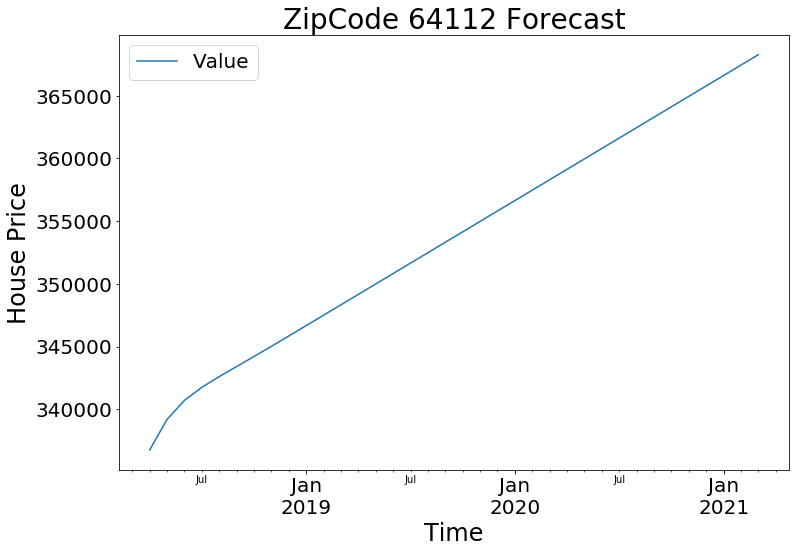

In [67]:
df_forecast.plot(figsize=(12,8))
plt.title('ZipCode 64112 Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

At this point we concatenate the actual values and the forecast.

In [68]:
zc_64112_forecast = pd.concat([zc_64112, df_forecast])
print(zc_64112_forecast.head())
print(zc_64112_forecast.tail())

            Value     value
1996-04-01    nan 118500.00
1996-05-01    nan 119600.00
1996-06-01    nan 120600.00
1996-07-01    nan 121600.00
1996-08-01    nan 122500.00
               Value  value
2020-11-01 364951.16    nan
2020-12-01 365781.79    nan
2021-01-01 366612.41    nan
2021-02-01 367443.04    nan
2021-03-01 368273.66    nan


In [69]:
zc_64112_forecast.rename(columns={"Value": "Forecast Value", "value": "Current Value"}, inplace=True)
zc_64112_forecast.head()

,Forecast Value,Current Value
1996-04-01,nan,118500.00
1996-05-01,nan,119600.00
1996-06-01,nan,120600.00
1996-07-01,nan,121600.00
1996-08-01,nan,122500.00


Now we are going to plot our Value plus the forecast on the same graphic.

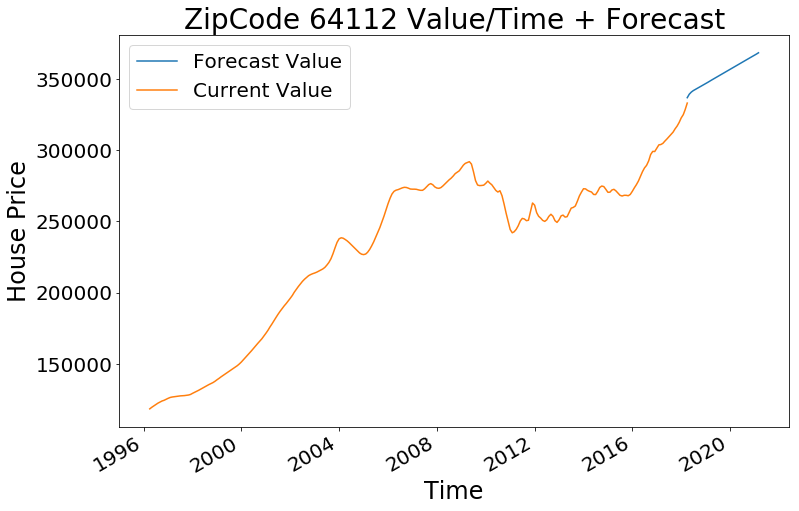

In [70]:
zc_64112_forecast.plot(figsize=(12,8))
plt.title('ZipCode 64112 Value/Time + Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

# Zipcode : 66103 
# Location: Kansas City, KS

In [71]:
zc_66103 = df[df['RegionName'] == 66103]
zc_66103 = melt_data(zc_66103)
zc_66103.head()

,value
time,
1996-04-01,48600.00
1996-05-01,48800.00
1996-06-01,49000.00
1996-07-01,49300.00
1996-08-01,49500.00


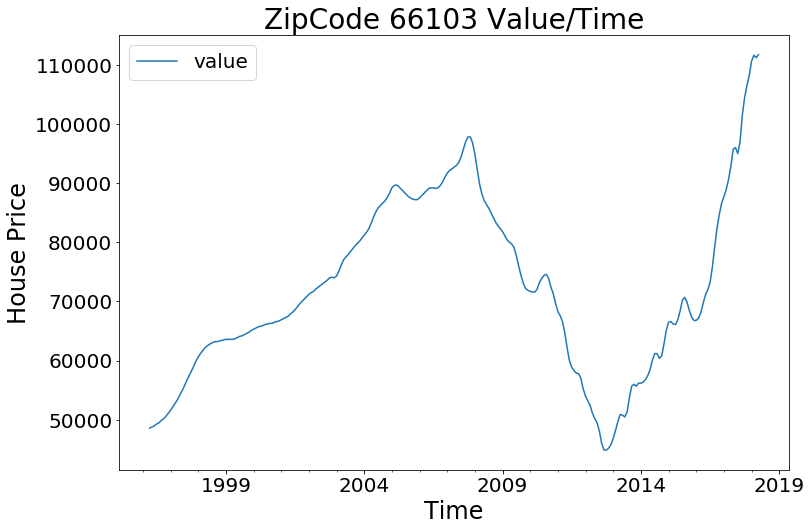

In [72]:
zc_66103.plot(figsize=(12,8))
plt.title('ZipCode 66103 Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

In [73]:
model = ARIMA(zc_66103, order = (1,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1992.198
Method:                       css-mle   S.D. of innovations            456.459
Date:                Thu, 07 Nov 2019   AIC                           3992.396
Time:                        14:34:01   BIC                           4006.700
Sample:                    05-01-1996   HQIC                          3998.144
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           248.7080    155.259      1.602      0.110     -55.593     553.009
ar.L1.D.value     0.7045      0.045     15.504      0.000       0.615       0.794
ma.L1.D.value     0.6498      0.040     

The model returns a lot of information, but we'll focus only on the table of coefficients. 

The coef column above shows the importance of each feature and how each one impacts the time series patterns. 

The P>|z| provides the significance of each feature weight.

For our time-series, we see that each weight has a p-value lower than 0.05, so it is reasonable to retain all of them in our model.

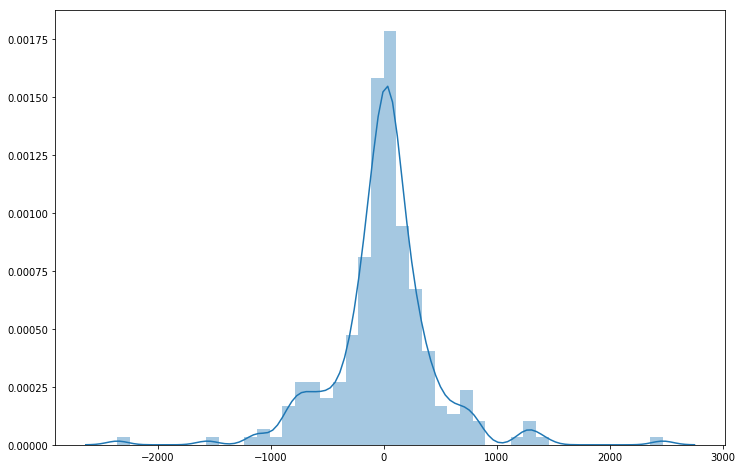

In [74]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12,8))
sns.distplot(residuals);

As we can see our residuals are relatively normal.

<Figure size 864x576 with 0 Axes>

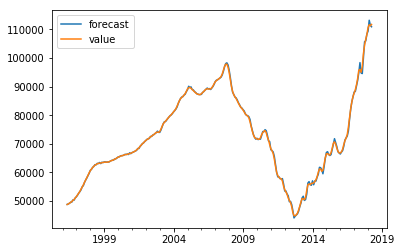

In [75]:
plt.figure(figsize=(12,8))
model_fit.plot_predict();

Next step is to create a graphic with the actual value for the properties that we already have and the forecast.
To do so we are first going to create a new DateTime Index starting 1 month after our actual DateTime and ending 36 months after.

In [76]:
new_per = pd.date_range(start='2018/04/01', periods=36, freq='MS')
new_per[:5]

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01'],
              dtype='datetime64[ns]', freq='MS')

Here we can see all our values forecasted for the next 36 months.

In [77]:
model_fit.forecast(36)[0]

array([112654.90439252, 113401.16151851, 114000.41666918, 114496.10189965,
       114918.81716935, 115290.12161278, 115625.20467101, 115934.76803151,
       116226.35154479, 116505.26739603, 116775.25827369, 117038.96108073,
       117298.23364137, 117554.38488159, 117808.33700235, 118060.73973829,
       118312.05085855, 118562.59288336, 118812.59304367, 119062.21143452,
       119311.56085054, 119560.72076092, 119809.74715553, 120058.67948189,
       120307.54553266, 120556.36488912, 120805.15134721, 121053.91462681,
       121302.66157607, 121551.39701982, 121800.12435738, 122048.84598375,
       122297.56358632, 122546.27835392, 122794.99112414, 123043.70248713])

In [78]:
df_forecast = pd.DataFrame(model_fit.forecast(36)[0])
df_forecast.columns = ['Value']
df_forecast.head()

,Value
0,112654.90
1,113401.16
2,114000.42
3,114496.10
4,114918.82


In [79]:
df_forecast = df_forecast.set_index(new_per)
df_forecast.head()

,Value
2018-04-01,112654.90
2018-05-01,113401.16
2018-06-01,114000.42
2018-07-01,114496.10
2018-08-01,114918.82


We are going to plot our forecast.

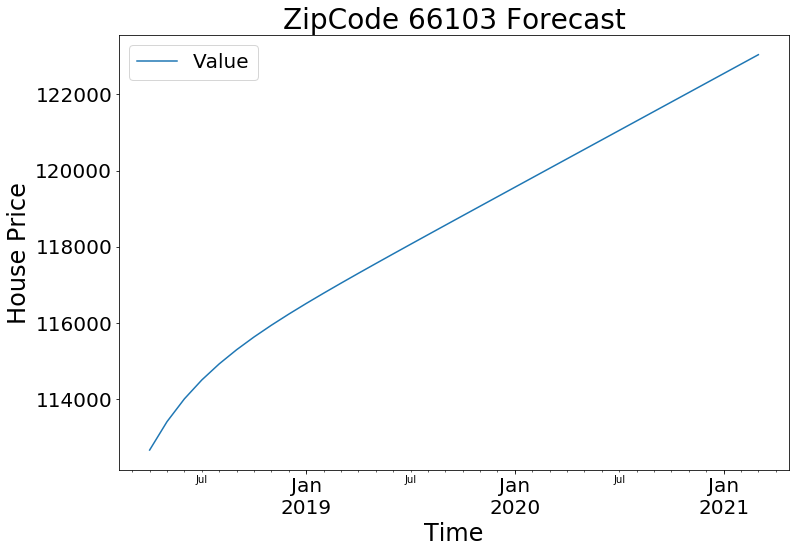

In [80]:
df_forecast.plot(figsize=(12,8))
plt.title('ZipCode 66103 Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

At this point we concatenate the actual values and the forecast.

In [81]:
zc_66103_forecast = pd.concat([zc_66103, df_forecast])
print(zc_66103_forecast.head())
print(zc_66103_forecast.tail())

            Value    value
1996-04-01    nan 48600.00
1996-05-01    nan 48800.00
1996-06-01    nan 49000.00
1996-07-01    nan 49300.00
1996-08-01    nan 49500.00
               Value  value
2020-11-01 122048.85    nan
2020-12-01 122297.56    nan
2021-01-01 122546.28    nan
2021-02-01 122794.99    nan
2021-03-01 123043.70    nan


In [82]:
zc_66103_forecast.rename(columns={"Value": "Forecast Value", "value": "Current Value"}, inplace=True)
zc_66103_forecast.head()

,Forecast Value,Current Value
1996-04-01,nan,48600.00
1996-05-01,nan,48800.00
1996-06-01,nan,49000.00
1996-07-01,nan,49300.00
1996-08-01,nan,49500.00


Now we are going to plot our Value plus the forecast on the same graphic.

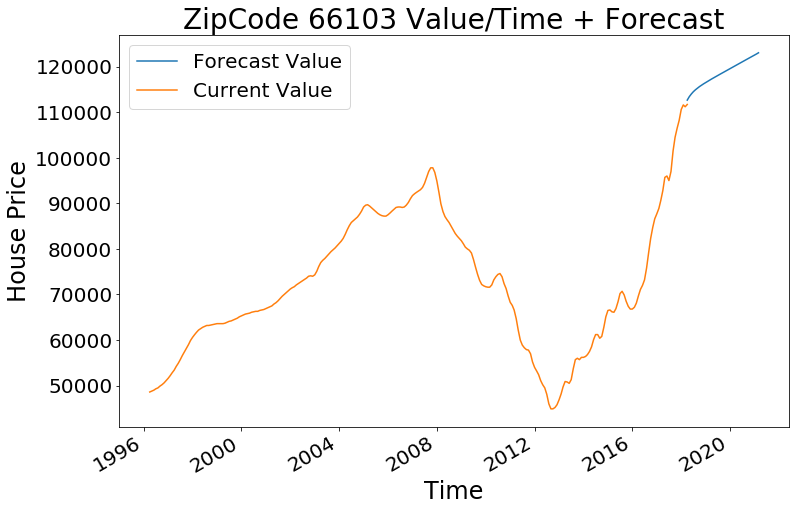

In [83]:
zc_66103_forecast.plot(figsize=(12,8))
plt.title('ZipCode 66103 Value/Time + Forecast', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

# Interpreting Results

Here are the 5 best Zip Codes to invest in Kansas City and the relative ROI for 3 years.

In [84]:
df_top_5['Value In 3 Years 1000000 Invested'] = (df_top_5['ROI']+1)*1000000
df_top_5

,ZipCode,ROI,Value In 3 Years 1000000 Invested
0,64106,0.15,1147370.96
1,66106,0.14,1137398.54
2,64114,0.12,1119297.07
3,64112,0.11,1105926.92
4,66103,0.10,1101555.08


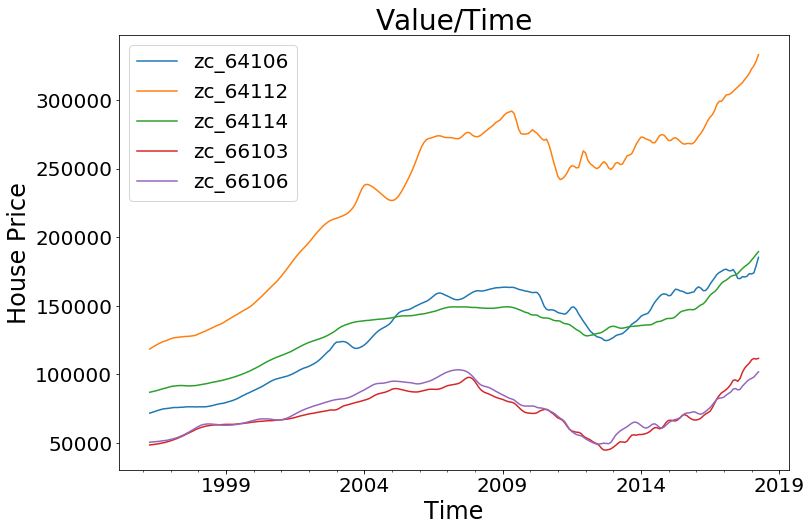

In [85]:
zips = pd.concat([zc_64106,zc_64112,zc_64114,zc_66103,zc_66106], axis=1)
zips.columns=['zc_64106','zc_64112','zc_64114','zc_66103','zc_66106']
zips.plot(figsize=(12,8))
plt.title('Value/Time', fontsize=28)
plt.xlabel('Time', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('House Price', fontsize=24)
plt.legend(fontsize=20);

As we can see all these zipcodes result pretty remunerative in a 3 years period and from the graph above we notice a linear upward trend for all of them.

The ROI is almost identical for these 5 Zip Codes so we advice to differentiate the investment not only as said before on the location of the Zip Code, it's interesting to notice in fact that we are in the condition of investing on different potential targets of people, young couples or single people for example, based on the property prices. 

Prices are ranging from 100000 for the Zip Codes 66106, 66103 to over 300000 for the Zip Code 64112 making our strategy potentially wide and effective. 

Let's plot our zipcodes on a map in order to get an understanding of where are precisely located.

In [86]:
kansas_city_map = folium.Map(location=[39.0997, -94.5786], tiles='Stamen Toner')

folium.CircleMarker(location=[39.1040, -94.5702],radius=15,popup='zc_64106',color='#3186cc',fill=True,fill_color='#3186cc'
).add_to(kansas_city_map)

folium.CircleMarker(location=[39.0704, -94.6967],radius=15,popup='zc_66103',color='red',fill=True,fill_color='red'
).add_to(kansas_city_map)

folium.CircleMarker(location=[38.9547, -94.5986],radius=15,popup='zc_64114',color='green',fill=True,fill_color='green'
).add_to(kansas_city_map)

folium.CircleMarker(location=[39.0379, -94.5986],radius=15,popup='zc_64112',color='orange',fill=True,fill_color='orange'
).add_to(kansas_city_map)

folium.CircleMarker(location=[39.0575, -94.6295],radius=15,popup='zc_64106',color='purple',fill=True,fill_color='purple'
).add_to(kansas_city_map)


kansas_city_map